# Question 2

I had limited access to data but with the data I gathered from PFF I was able to create this graph to show the relationship between total fantasy points and relative draft ADP for each position.

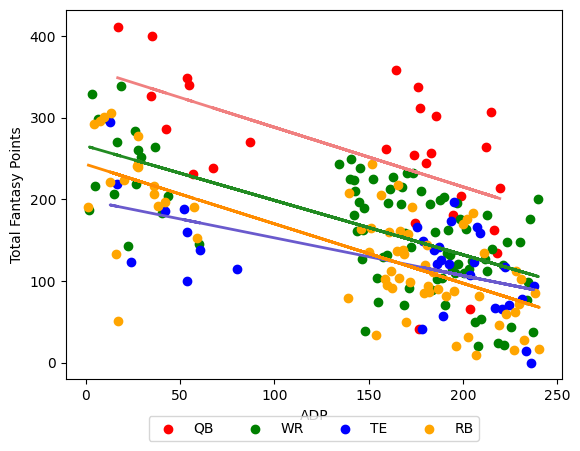

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def diff(a, b):
    return b - a

# Best ball 1 QB, 2 RB, 3 WR, 1 TE, 1 FLEX format
total_pos = 8
tickLabels = ['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4', 'Tier 5', 'Tier 6']

df_main = pd.read_csv('draft-rankings-export_0.csv')
df_ppr_concensus = pd.read_csv('draft-rankings-export_1.csv')
df_ppr_concensus=df_ppr_concensus.drop(columns=['Position Rank'])

df1 = pd.merge(df_main.drop(columns=['ADP'], axis=1), df_ppr_concensus.filter(['Name','ADP'], axis=1), on='Name')
df = df1[['Name','Position Rank', 'ADP', 'Position', 'expertConsensus', "Proj Pts"]]
df=df[df['Position Rank'] < 990]
df = df[df['ADP'] < 250]
#print(df[df['ADP'].between(50, 70)])
fig, ax = plt.subplots()
df = df.dropna()
colors = {'QB':'red', 'WR':'green', 'RB':'blue', 'TE':'yellow'}

QB_df = df[df['Position'] == 'QB']
WR_df = df[df['Position'] == 'WR']
TE_df = df[df['Position'] == 'TE']
RB_df = df[df['Position'] == 'RB']

plt.scatter(QB_df["ADP"], QB_df['Proj Pts'],c='red', label="QB")
np_array = QB_df.to_numpy
a, b = np.polyfit(QB_df["ADP"], QB_df['Proj Pts'], 1)
plt.plot(QB_df["ADP"], a*QB_df["ADP"]+b, color='lightcoral', linewidth=2)  
plt.scatter(WR_df["ADP"], WR_df['Proj Pts'],c='green', label="WR")
a, b = np.polyfit(WR_df["ADP"], WR_df['Proj Pts'], 1)
plt.plot(WR_df["ADP"], a*WR_df["ADP"]+b, color='forestgreen', linewidth=2) 
plt.scatter(TE_df["ADP"], TE_df['Proj Pts'],c='blue', label="TE")
a, b = np.polyfit(TE_df["ADP"], TE_df['Proj Pts'], 1)
plt.plot(TE_df["ADP"], a*TE_df["ADP"]+b, color='slateblue', linewidth=2) 
plt.scatter(RB_df["ADP"], RB_df['Proj Pts'],c='orange', label="RB")
a, b = np.polyfit(RB_df["ADP"], RB_df['Proj Pts'], 1)
plt.plot(RB_df["ADP"], a*RB_df["ADP"]+b, color='darkorange', linewidth=2) 
#data1 = plt.scatter(df[df['ADP'], df['Position'] == 'QB',], df[df['Proj Pts'], df['Position'] == 'QB',], marker='d', color=colors[0],label='Label 1')

plt.ylabel('Total Fantasy Points')
plt.xlabel('ADP')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=4)

plt.show()